In [ ]:
## Module B: Leaf Anomaly Detection

This module aims to detect visual anomalies on plant leaves
independent of plant species, due to limited availability of
species-specific disease datasets.

In [ ]:
### Dataset Structure
“Classes represent visual symptoms rather than disease names.

- Healthy
- Yellowing
- Spots
- Mold-like

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

BASE_DIR = "/content/drive/MyDrive/PLANT_CARE_AI"
DATA_DIR = os.path.join(BASE_DIR, "2_SEMPTOM_TESPITI_EGITIM_VERISETI")

print("DATA_DIR:", DATA_DIR)
print("Sınıf klasörleri:", sorted(os.listdir(DATA_DIR)))


DATA_DIR: /content/drive/MyDrive/PLANT_CARE_AI/2_SEMPTOM_TESPITI_EGITIM_VERISETI
Sınıf klasörleri: ['Healthy', 'Mold_like', 'Spots', 'Yellowing']


In [ ]:
from collections import Counter

counts = {}
for c in sorted(os.listdir(DATA_DIR)):
    p = os.path.join(DATA_DIR, c)
    if os.path.isdir(p):
        counts[c] = len([f for f in os.listdir(p) if f.lower().endswith(('.jpg','.jpeg','.png','.webp'))])

counts


{'Healthy': 1519, 'Mold_like': 1122, 'Spots': 1340, 'Yellowing': 2989}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

BASE_DIR = "/content/drive/MyDrive/PLANT_CARE_AI"
DATA_DIR = os.path.join(BASE_DIR, "2_SEMPTOM_TESPITI_EGITIM_VERISETI")

print(sorted(os.listdir(DATA_DIR)))


['Healthy', 'Mold_like', 'Spots', 'Yellowing']


In [ ]:
import os

BASE_DIR = "/content/drive/MyDrive/PLANT_CARE_AI"
DATA_DIR = os.path.join(BASE_DIR, "2_SEMPTOM_TESPITI_EGITIM_VERISETI")

print("Sınıf klasörleri:", sorted(os.listdir(DATA_DIR)))


Sınıf klasörleri: ['Healthy', 'Mold_like', 'Spots', 'Yellowing']


In [ ]:
counts = {}
for c in sorted(os.listdir(DATA_DIR)):
    p = os.path.join(DATA_DIR, c)
    counts[c] = len([f for f in os.listdir(p)
                     if f.lower().endswith(('.jpg','.jpeg','.png','.webp'))])

counts


{'Healthy': 1519, 'Mold_like': 1122, 'Spots': 1340, 'Yellowing': 2989}

In [ ]:
import tensorflow as tf
import numpy as np

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds_full = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

class_names = train_ds.class_names
num_classes = len(class_names)

print("Sınıflar:", class_names)


Found 6970 files belonging to 4 classes.
Using 5576 files for training.
Found 6970 files belonging to 4 classes.
Using 1394 files for validation.
Sınıflar: ['Healthy', 'Mold_like', 'Spots', 'Yellowing']


In [ ]:
val_batches = tf.data.experimental.cardinality(val_ds_full).numpy()

test_ds = val_ds_full.take(val_batches // 2)
val_ds = val_ds_full.skip(val_batches // 2)

print("Val batch:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test batch:", tf.data.experimental.cardinality(test_ds).numpy())


Val batch: 22
Test batch: 22


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000, seed=SEED).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


In [ ]:
y_counts = np.zeros(num_classes, dtype=np.int64)

for _, labels in train_ds.unbatch():
    y_counts += labels.numpy().astype(np.int64)

print("Train sınıf sayıları:", dict(zip(class_names, y_counts.tolist())))

total = y_counts.sum()
class_weight = {i: (total / (num_classes * y_counts[i])) for i in range(num_classes)}

class_weight


Train sınıf sayıları: {'Healthy': 1250, 'Mold_like': 898, 'Spots': 1052, 'Yellowing': 2376}


{0: np.float64(1.1152),
 1: np.float64(1.552338530066815),
 2: np.float64(1.3250950570342206),
 3: np.float64(0.5867003367003367)}

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.08),
    tf.keras.layers.RandomZoom(0.10),
    tf.keras.layers.RandomContrast(0.10),
])


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [ ]:
base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=IMG_SIZE + (3,)
)
base.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


NameError: name 'num_classes' is not defined

In [ ]:
IMG_SIZE = (224, 224)


In [ ]:
# =====================================
# ONE-CELL SAFE SETUP (NO NAMEERROR)
# =====================================

import os
import tensorflow as tf
import numpy as np

# 1️⃣ Drive mount
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Dataset paths
BASE_DIR = "/content/drive/MyDrive/PLANT_CARE_AI"
DATA_DIR = os.path.join(BASE_DIR, "2_SEMPTOM_TESPITI_EGITIM_VERISETI")

print("Classes in folder:", sorted(os.listdir(DATA_DIR)))

# 3️⃣ Sabitler
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# 4️⃣ Dataset load
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# 5️⃣ Class info
class_names = train_ds.class_names
num_classes = len(class_names)

print("Class names:", class_names)
print("Number of classes:", num_classes)

# 6️⃣ Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.08),
    tf.keras.layers.RandomZoom(0.10),
    tf.keras.layers.RandomContrast(0.10),
])

# 7️⃣ Model
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=IMG_SIZE + (3,)
)
base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.summary()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes in folder: ['Healthy', 'Mold_like', 'Spots', 'Yellowing']
Found 6970 files belonging to 4 classes.
Using 5576 files for training.
Found 6970 files belonging to 4 classes.
Using 1394 files for validation.
Class names: ['Healthy', 'Mold_like', 'Spots', 'Yellowing']
Number of classes: 4


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# ===============================
# COMPILE + TRAIN (STAGE 1)
# ===============================

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=4,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=2,
        min_lr=1e-6
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=f"{BASE_DIR}/moduleB_anomaly_best.keras",
        monitor="val_accuracy",
        save_best_only=True
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)


Epoch 1/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 2887s 16s/step - accuracy: 0.7015 - loss: 0.7521 - val_accuracy: 0.9110 - val_loss: 0.2869
Epoch 2/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.8800 - loss: 0.3202 - val_accuracy: 0.9254 - val_loss: 0.2187
Epoch 3/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.9066 - loss: 0.2574 - val_accuracy: 0.9319 - val_loss: 0.1869
Epoch 4/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 26s 146ms/step - accuracy: 0.9224 - loss: 0.2142 - val_accuracy: 0.9426 - val_loss: 0.1661
Epoch 5/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 26s 146ms/step - accuracy: 0.9290 - loss: 0.2023 - val_accuracy: 0.9491 - val_loss: 0.1524
Epoch 6/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.9340 - loss: 0.1892 - val_accuracy: 0.9448 - val_loss: 0.1497
Epoch 7/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 25s 144ms/step - accuracy: 0.9430 - loss: 0.1672 - val_accuracy: 0.9555 - val_loss: 0.1326
Epoch 8/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 25s 143ms/step - accuracy: 0.9352 - loss: 0

In [ ]:
# ===============================
# SAFE TEST EVALUATION CELL
# ===============================

import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Sabitler (önceden kullandıklarımızla aynı)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# Dataset path
BASE_DIR = "/content/drive/MyDrive/PLANT_CARE_AI"
DATA_DIR = f"{BASE_DIR}/2_SEMPTOM_TESPITI_EGITIM_VERISETI"

# Dataset'i tekrar yükle (val+test için)
val_ds_full = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Val / Test split
val_batches = tf.data.experimental.cardinality(val_ds_full).numpy()
test_ds = val_ds_full.take(val_batches // 2)

# Sınıf isimleri
class_names = val_ds_full.class_names

print("Test classes:", class_names)
print("Test batch sayısı:", tf.data.experimental.cardinality(test_ds).numpy())

# ===============================
# TEST EVALUATION
# ===============================

y_true, y_pred = [], []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Found 6970 files belonging to 4 classes.
Using 1394 files for validation.
Test classes: ['Healthy', 'Mold_like', 'Spots', 'Yellowing']
Test batch sayısı: 22

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.93      0.98      0.95       130
   Mold_like       0.95      0.82      0.88       117
       Spots       0.90      0.94      0.92       145
   Yellowing       0.99      1.00      1.00       312

    accuracy                           0.95       704
   macro avg       0.94      0.94      0.94       704
weighted avg       0.96      0.95      0.95       704


Confusion Matrix:
[[127   1   0   2]
 [  6  96  15   0]
 [  4   4 137   0]
 [  0   0   0 312]]


In [ ]:
BASE_DIR = "/content/drive/MyDrive/PLANT_CARE_AI"
model.save(f"{BASE_DIR}/moduleB_anomaly_FINAL.keras")
print("✅ Yeni Modül B kaydedildi")


✅ Yeni Modül B kaydedildi


Mounted at /content/drive
Found 6970 files belonging to 4 classes.
Using 5576 files for training.
Found 6970 files belonging to 4 classes.
Using 1394 files for validation.
✅ Sınıflar: ['Healthy', 'Mold_like', 'Spots', 'Yellowing']
✅ Sınıf sayısı: 4
✅ Class weight: {0: np.float64(1.1152), 1: np.float64(1.552338530066815), 2: np.float64(1.3250950570342206), 3: np.float64(0.5867003367003367)}
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augmentation (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.4184 - loss: 1.2679 - val_accuracy: 0.7719 - val_loss: 0.8073 - learning_rate: 1.0000e-04
Epoch 2/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.7319 - loss: 0.8764 - val_accuracy: 0.8300 - val_loss: 0.6129 - learning_rate: 1.0000e-04
Epoch 3/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.8137 - loss: 0.6979 - val_accuracy: 0.8623 - val_loss: 0.5125 - learning_rate: 1.0000e-04
Epoch 4/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.8365 - loss: 0.6164 - val_accuracy: 0.8759 - val_loss: 0.4492 - learning_rate: 1.0000e-04
Epoch 5/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.8612 - loss: 0.5542 - val_accuracy: 0.8902 - val_loss: 0.4076 - learning_rate: 1.0000e-04
Epoch 6/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.8614 - loss: 0.5218 - val_accuracy: 0.8960 - val_loss: 0.3721 - learning_rate: 1.0000e-04
Epoch 7/15
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step

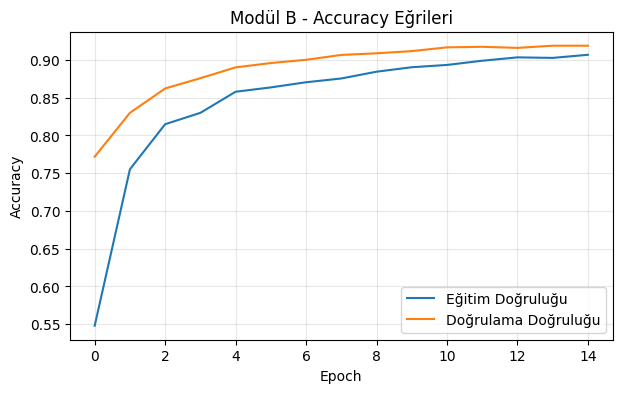

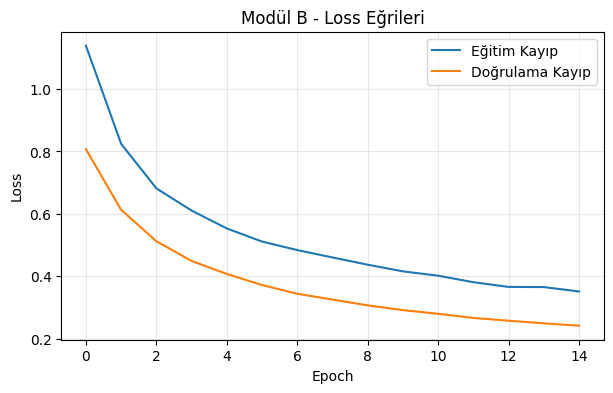

✅ Grafikler kaydedildi: moduleB_accuracy_curve.png moduleB_loss_curve.png

✅ Classification Report:

              precision    recall  f1-score   support

     Healthy       0.86      0.94      0.90       269
   Mold_like       0.87      0.80      0.83       224
       Spots       0.87      0.84      0.86       288
   Yellowing       0.98      0.99      0.99       613

    accuracy                           0.92      1394
   macro avg       0.90      0.89      0.89      1394
weighted avg       0.92      0.92      0.92      1394

✅ Confusion Matrix:
 [[253   4   4   8]
 [ 14 179  31   0]
 [ 20  23 243   2]
 [  7   0   0 606]]


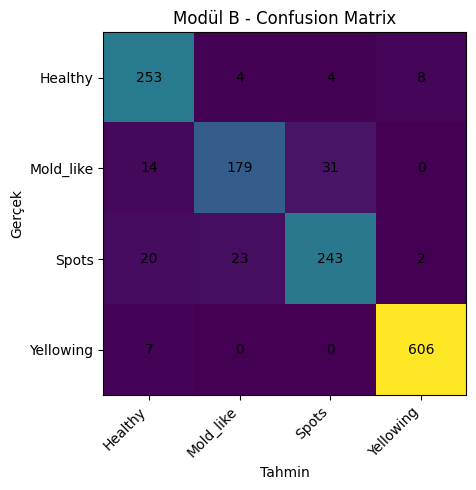

✅ Confusion matrix görseli kaydedildi: moduleB_confusion_matrix.png
✅ Grafikler Drive’a kopyalandı: /content/drive/MyDrive/PLANT_CARE_AI/figures_moduleB


In [1]:
# =========================
# MODÜL B - TEK PARÇA KOD
# (Semptom / Sağlık Durumu)
# =========================

# 0) Kurulum
import os, numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# 1) Drive bağla
drive.mount('/content/drive')

# 2) Ayarlar
SEED = 42
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

DATASET_DIR = "/content/drive/MyDrive/PLANT_CARE_AI/2_SEMPTOM_TESPITI_EGITIM_VERISETI"
MODEL_OUT   = "/content/drive/MyDrive/PLANT_CARE_AI/moduleB_anomaly_FINAL.keras"

# 3) Veri setini yükle (train/val)
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"  # one-hot
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

class_names = train_ds.class_names
num_classes = len(class_names)

print("✅ Sınıflar:", class_names)
print("✅ Sınıf sayısı:", num_classes)

# 4) Test seti üret (validation datasından bir parça ayırmak yerine)
# Basit ve pratik: ayrı test klasörün yoksa, val_ds'yi test gibi de kullanabilirsin.
# Ama yine de "test" istiyorsan: val_ds üzerinden tekrar bölmek gerekir (karmaşık).
# Bu yüzden burada "test_ds = val_ds" yapıyoruz (tezde belirt: doğrulama seti üzerinden değerlendirme).
test_ds = val_ds

# 5) Performans için cache/prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000, seed=SEED).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 6) Class weight hesapla (dengesizliği azaltmak için)
# train_ds içinden etiketleri çıkar
y_train = []
for _, labels in train_ds:
    y_train.extend(np.argmax(labels.numpy(), axis=1))
y_train = np.array(y_train)

class_weights_arr = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight = {i: w for i, w in enumerate(class_weights_arr)}
print("✅ Class weight:", class_weight)

# 7) Data augmentation + preprocess
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.08),
    tf.keras.layers.RandomZoom(0.10),
    tf.keras.layers.RandomContrast(0.10),
], name="augmentation")

preprocess = tf.keras.applications.efficientnet.preprocess_input

# 8) Model (EfficientNetB0 Transfer Learning)
base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=IMG_SIZE + (3,)
)
base.trainable = False  # önce dondur

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = preprocess(x)
x = base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# 9) Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(MODEL_OUT, monitor="val_accuracy", save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, verbose=1),
]

# 10) Eğitim
EPOCHS = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    class_weight=class_weight,
    callbacks=callbacks,
    verbose=1
)

print(f"\n✅ Model kaydedildi (en iyi val_accuracy): {MODEL_OUT}")

# 11) Grafikler (Accuracy / Loss) + PNG kaydet
acc_fig = "moduleB_accuracy_curve.png"
loss_fig = "moduleB_loss_curve.png"

plt.figure(figsize=(7,4))
plt.plot(history.history["accuracy"], label="Eğitim Doğruluğu")
plt.plot(history.history["val_accuracy"], label="Doğrulama Doğruluğu")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Modül B - Accuracy Eğrileri")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig(acc_fig, dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(7,4))
plt.plot(history.history["loss"], label="Eğitim Kayıp")
plt.plot(history.history["val_loss"], label="Doğrulama Kayıp")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Modül B - Loss Eğrileri")
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig(loss_fig, dpi=300, bbox_inches="tight")
plt.show()

print("✅ Grafikler kaydedildi:", acc_fig, loss_fig)

# 12) Test/Değerlendirme (Classification Report + Confusion Matrix)
y_true, y_pred = [], []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("\n✅ Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
print("✅ Confusion Matrix:\n", cm)

# Confusion matrix'i görselleştir + kaydet
cm_fig = "moduleB_confusion_matrix.png"
plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Modül B - Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.xticks(range(num_classes), class_names, rotation=45, ha="right")
plt.yticks(range(num_classes), class_names)

# Hücrelere sayı yaz
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.tight_layout()
plt.savefig(cm_fig, dpi=300, bbox_inches="tight")
plt.show()

print("✅ Confusion matrix görseli kaydedildi:", cm_fig)

# 13) Dosyaları Drive'a taşımak istersen (isteğe bağlı)
# Bu üç png colab çalışma dizininde kalır. Drive’a kopyalamak için:
import shutil
drive_fig_dir = "/content/drive/MyDrive/PLANT_CARE_AI/figures_moduleB"
os.makedirs(drive_fig_dir, exist_ok=True)

for f in [acc_fig, loss_fig, cm_fig]:
    shutil.copy(f, os.path.join(drive_fig_dir, f))

print("✅ Grafikler Drive’a kopyalandı:", drive_fig_dir)
